# Working with Insurance Dataset

CMS Medicare Data: 

- dataset: https://data.cms.gov/summary-statistics-on-beneficiary-enrollment/medicare-and-medicaid-reports/medicare-monthly-enrollment
- data dictionary: https://data.cms.gov/resources/medicare-monthly-enrollment-data-dictionary

### Imports

In [1]:
import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

### Insurance EDA

In [2]:
cms_df = pd.read_csv('Medicare_Monthly_Enrollment_May_2024.csv')
cms_df.head()

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,B_TOT_BENES,B_ORGNL_MDCR_BENES,B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
0,2013,Year,National,US,National,Total,,52425659,37613096,14812563,...,47959444,33147099,14812345,35679758,22661451,13018307,10000861,1030113,409204,24239580
1,2013,Year,State,AL,Alabama,Total,01,921477,711448,210029,...,862992,652965,210026,637247,437749,199498,205496,32790,11452,387510
2,2013,Year,County,AL,Alabama,Autauga County,01001,9323,6484,2840,...,8742,5902,2840,6036,3268,2767,1839,296,105,3796
3,2013,Year,County,AL,Alabama,Baldwin County,01003,41033,28775,12258,...,38651,26393,12258,27352,15593,11759,5276,867,379,20830
4,2013,Year,County,AL,Alabama,Barbour County,01005,5847,5036,810,...,5515,4704,810,4170,3410,759,1783,304,73,2009


In [3]:
# filter down to massachusets
cms_mass_df = cms_df[cms_df['BENE_STATE_ABRVTN'] == 'MA']
cms_mass_df.head()

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,B_TOT_BENES,B_ORGNL_MDCR_BENES,B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
1260,2013,Year,State,MA,Massachusetts,Total,25,1158001,943576,214426,...,1040910,826496,214413,739921,537904,202018,276249,10226,7886,445561
1261,2013,Year,County,MA,Massachusetts,Barnstable County,25001,66534,60350,6184,...,61835,55651,6184,38863,33219,5644,7806,452,321,30284
1262,2013,Year,County,MA,Massachusetts,Berkshire County,25003,30786,29664,1122,...,28522,27400,1122,20036,18972,1064,7232,238,254,12311
1263,2013,Year,County,MA,Massachusetts,Bristol County,25005,106422,91558,14864,...,97110,82246,14864,69806,55263,14543,31029,1321,1185,36272
1264,2013,Year,County,MA,Massachusetts,Dukes County,25007,3798,3744,53,...,3499,3446,53,2175,2132,43,436,28,17,1694


In [4]:
# convert object types to numeric where applicable
cols = cms_mass_df.columns.drop(['MONTH', 'BENE_GEO_LVL', 'BENE_STATE_ABRVTN', 'BENE_STATE_DESC', 'BENE_COUNTY_DESC'])
cms_mass_df[cols] = cms_mass_df[cols].apply(pd.to_numeric, errors='coerce')
cms_mass_df.describe()

/var/folders/z6/d0zj0b9s1lv9vyh5km30751h0000gn/T/ipykernel_31580/1102287896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cms_mass_df[cols] = cms_mass_df[cols].apply(pd.to_numeric, errors='coerce')


,YEAR,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,AGED_TOT_BENES,AGED_ESRD_BENES,AGED_NO_ESRD_BENES,DSBLD_TOT_BENES,DSBLD_ESRD_AND_ESRD_ONLY_BENES,...,B_TOT_BENES,B_ORGNL_MDCR_BENES,B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
count,2368.000000,2368.000000,2.220000e+03,2.220000e+03,2220.000000,2.220000e+03,1988.000000,1.988000e+03,2220.000000,2001.000000,...,2.220000e+03,2220.000000,2220.000000,2.220000e+03,2220.000000,2220.000000,2220.000000,2002.000000,2002.000000,2220.000000
mean,2018.202703,23513.750000,1.737072e+05,1.293360e+05,44371.188739,1.477692e+05,651.572938,1.640226e+05,25937.989189,416.257871,...,1.562093e+05,111848.421622,44360.900901,1.299238e+05,88686.686036,41237.089640,42646.460360,1221.100400,758.123876,85477.223423
std,3.292699,6070.720026,3.102906e+05,2.301056e+05,83128.565102,2.648356e+05,1088.352162,2.738584e+05,46268.192672,695.496040,...,2.788256e+05,198768.109135,83105.847127,2.342058e+05,158562.104883,77307.030005,76246.682877,2093.099741,1412.491096,155909.109570
min,2013.000000,25.000000,1.546000e+03,1.526000e+03,20.000000,1.455000e+03,0.000000,1.643000e+03,63.000000,0.000000,...,1.419000e+03,1399.000000,20.000000,9.430000e+02,927.000000,16.000000,100.000000,17.000000,0.000000,823.000000
25%,2015.000000,25006.500000,3.274400e+04,2.642775e+04,5218.500000,2.712500e+04,111.000000,3.302950e+04,4863.250000,63.000000,...,2.993250e+04,23068.000000,5217.750000,2.453825e+04,19462.750000,4849.000000,6606.250000,216.000000,158.000000,17204.500000
50%,2018.000000,25014.000000,1.039085e+05,7.691050e+04,21961.000000,8.325450e+04,387.000000,8.814900e+04,15377.000000,259.000000,...,9.441600e+04,65879.500000,21959.500000,7.692950e+04,50336.500000,19921.000000,24713.500000,729.000000,337.000000,46153.500000
75%,2021.000000,25021.500000,1.412485e+05,1.003558e+05,43359.500000,1.198985e+05,559.000000,1.248402e+05,23931.750000,353.000000,...,1.262590e+05,85456.000000,43338.500000,1.065480e+05,71779.250000,41132.000000,39666.500000,1058.750000,675.750000,72661.500000
max,2024.000000,25999.000000,1.445583e+06,1.005975e+06,514344.000000,1.284837e+06,5205.000000,1.280471e+06,212191.000000,3015.000000,...,1.305702e+06,866549.000000,514042.000000,1.196784e+06,728139.000000,485090.000000,377975.000000,11017.000000,8402.000000,813802.000000


In [5]:
# check missing percentages for each feature
missing_vals_count = cms_mass_df.isna().sum()
percentage_missing = missing_vals_count / cms_mass_df.shape[0] * 100
print(f'PERCENTAGE OF MISSING VALUES BY COLUMN:\n{percentage_missing}')

PERCENTAGE OF MISSING VALUES BY COLUMN:
YEAR                                             0.000000
MONTH                                            0.000000
BENE_GEO_LVL                                     0.000000
BENE_STATE_ABRVTN                                0.000000
BENE_STATE_DESC                                  0.000000
BENE_COUNTY_DESC                                 0.000000
BENE_FIPS_CD                                     0.000000
TOT_BENES                                        6.250000
ORGNL_MDCR_BENES                                 6.250000
MA_AND_OTH_BENES                                 6.250000
AGED_TOT_BENES                                   6.250000
AGED_ESRD_BENES                                 16.047297
AGED_NO_ESRD_BENES                              16.047297
DSBLD_TOT_BENES                                  6.250000
DSBLD_ESRD_AND_ESRD_ONLY_BENES                  15.498311
DSBLD_NO_ESRD_BENES                             15.498311
MALE_TOT_BENES                  

In [8]:
# Boston is in Suffolk County, filter down to suffolk county
cms_suffolk_df = cms_mass_df[cms_mass_df['BENE_COUNTY_DESC'] == 'Suffolk County']
cms_suffolk_df.head()

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,B_TOT_BENES,B_ORGNL_MDCR_BENES,B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
1273,2013,Year,County,MA,Massachusetts,Suffolk County,25025,96914.0,81999.0,14914.0,...,86730.0,71819.0,14911.0,67725.0,53134.0,14590.0,42118.0,1268.0,760.0,23579.0
4608,2013,January,County,MA,Massachusetts,Suffolk County,25025,95608.0,81363.0,14245.0,...,85605.0,71362.0,14243.0,66808.0,52897.0,13911.0,40837.0,1362.0,808.0,23801.0
7943,2013,February,County,MA,Massachusetts,Suffolk County,25025,95724.0,81411.0,14313.0,...,85668.0,71358.0,14310.0,66902.0,52920.0,13982.0,41018.0,1352.0,802.0,23730.0
11278,2013,March,County,MA,Massachusetts,Suffolk County,25025,95973.0,81600.0,14373.0,...,85863.0,71492.0,14371.0,66961.0,52915.0,14046.0,41276.0,1328.0,783.0,23574.0
14613,2013,April,County,MA,Massachusetts,Suffolk County,25025,96181.0,81691.0,14490.0,...,86027.0,71539.0,14488.0,67184.0,53020.0,14164.0,41488.0,1298.0,755.0,23643.0


### MIMIC Hospital Admissions Data

In [9]:
# merge hospital admissions with patient table to get admit year
hosp_df = pd.read_csv('mimic-iv-3.0/hosp/admissions.csv')
patient_df = pd.read_csv('mimic-iv-3.0/hosp/patients.csv')
admissions_df = pd.merge(hosp_df, patient_df, on=['subject_id'], how='inner')
admissions_df.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,marital_status,race,edregtime,edouttime,hospital_expire_flag,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,...,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,F,52,2180,2014 - 2016,2180-09-09
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P784FA,EMERGENCY ROOM,HOME,Medicaid,...,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0,F,52,2180,2014 - 2016,2180-09-09
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P19UTS,EMERGENCY ROOM,HOSPICE,Medicaid,...,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0,F,52,2180,2014 - 2016,2180-09-09
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P06OTX,EMERGENCY ROOM,HOME,Medicaid,...,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0,F,52,2180,2014 - 2016,2180-09-09
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P39NWO,EMERGENCY ROOM,NaN,NaN,...,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0,F,19,2160,2008 - 2010,NaN


In [10]:
# insurance distribution values
admissions_df = admissions_df.dropna(subset=['insurance'])
admissions_df['insurance'].value_counts()

insurance
Medicare     244576
Private      173399
Medicaid     104229
Other         14006
No charge       463
Name: count, dtype: int64

### Joining Data

In [11]:
# get necessary datetime columns
admissions_df['admittime'] = pd.to_datetime(admissions_df['admittime'])
admissions_df['admit_month'] = admissions_df['admittime'].dt.month.apply(lambda x: calendar.month_name[x])
admissions_df[['start_year', 'end_year']] = admissions_df['anchor_year_group'].str.split('-', expand=True)
admissions_df['start_year'] = admissions_df['start_year'].astype(int)
admissions_df['end_year'] = admissions_df['end_year'].astype(int)
admissions_df.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,edouttime,hospital_expire_flag,gender,anchor_age,anchor_year,anchor_year_group,dod,admit_month,start_year,end_year
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,...,2180-05-06 23:30:00,0,F,52,2180,2014 - 2016,2180-09-09,May,2014,2016
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P784FA,EMERGENCY ROOM,HOME,Medicaid,...,2180-06-26 21:31:00,0,F,52,2180,2014 - 2016,2180-09-09,June,2014,2016
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P19UTS,EMERGENCY ROOM,HOSPICE,Medicaid,...,2180-08-06 01:44:00,0,F,52,2180,2014 - 2016,2180-09-09,August,2014,2016
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P06OTX,EMERGENCY ROOM,HOME,Medicaid,...,2180-07-23 14:00:00,0,F,52,2180,2014 - 2016,2180-09-09,July,2014,2016
5,10000084,23052089,2160-11-21 01:56:00,2160-11-25 14:52:00,NaN,EW EMER.,P42H7G,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,...,2160-11-21 03:20:00,0,M,72,2160,2017 - 2019,2161-02-13,November,2017,2019


In [13]:
# join on admit month and admit year
# temporarily joining on start_year, will probably need to be changed
medicare_admissions = admissions_df[admissions_df['insurance'] == 'Medicare']
merged_df = pd.merge(medicare_admissions, cms_suffolk_df,
                     how='inner',
                     left_on=['start_year', 'admit_month'], 
                     right_on=['YEAR', 'MONTH'])
print(merged_df.columns)
merged_df.head()

Index(['subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime',
       'admission_type', 'admit_provider_id', 'admission_location',
       'discharge_location', 'insurance', 'language', 'marital_status', 'race',
       'edregtime', 'edouttime', 'hospital_expire_flag', 'gender',
       'anchor_age', 'anchor_year', 'anchor_year_group', 'dod', 'admit_month',
       'start_year', 'end_year', 'YEAR', 'MONTH', 'BENE_GEO_LVL',
       'BENE_STATE_ABRVTN', 'BENE_STATE_DESC', 'BENE_COUNTY_DESC',
       'BENE_FIPS_CD', 'TOT_BENES', 'ORGNL_MDCR_BENES', 'MA_AND_OTH_BENES',
       'AGED_TOT_BENES', 'AGED_ESRD_BENES', 'AGED_NO_ESRD_BENES',
       'DSBLD_TOT_BENES', 'DSBLD_ESRD_AND_ESRD_ONLY_BENES',
       'DSBLD_NO_ESRD_BENES', 'MALE_TOT_BENES', 'FEMALE_TOT_BENES',
       'WHITE_TOT_BENES', 'BLACK_TOT_BENES', 'API_TOT_BENES',
       'HSPNC_TOT_BENES', 'NATIND_TOT_BENES', 'OTHR_TOT_BENES',
       'AGE_LT_25_BENES', 'AGE_25_TO_44_BENES', 'AGE_45_TO_64_BENES',
       'AGE_65_TO_69_BENES', 'AGE_70

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,B_TOT_BENES,B_ORGNL_MDCR_BENES,B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
0,10000084,23052089,2160-11-21 01:56:00,2160-11-25 14:52:00,NaN,EW EMER.,P42H7G,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,...,94204.0,66745.0,27459.0,80129.0,53810.0,26319.0,46615.0,991.0,562.0,31961.0
1,10000084,29888819,2160-12-28 05:11:00,2160-12-28 16:07:00,NaN,EU OBSERVATION,P35NE4,PHYSICIAN REFERRAL,NaN,Medicare,...,94384.0,66815.0,27569.0,80315.0,53886.0,26429.0,46835.0,976.0,552.0,31952.0
2,10000635,20642640,2143-12-23 14:55:00,2143-12-24 12:52:00,NaN,EU OBSERVATION,P553YZ,WALK-IN/SELF REFERRAL,NaN,Medicare,...,89748.0,68384.0,21364.0,70707.0,49870.0,20837.0,45132.0,1065.0,649.0,23861.0
3,10000635,26134563,2136-06-19 14:24:00,2136-06-20 11:30:00,NaN,AMBULATORY OBSERVATION,P96UW1,PROCEDURE SITE,NaN,Medicare,...,88136.0,69330.0,18806.0,69465.0,51192.0,18273.0,43544.0,1121.0,673.0,24127.0
4,10000764,27897940,2132-10-14 23:31:00,2132-10-19 16:30:00,NaN,URGENT,P38YR6,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicare,...,89402.0,68814.0,20588.0,70394.0,50336.0,20058.0,44597.0,1106.0,655.0,24036.0


## General Insurance Visualizations

### Distribution of Insurance Coverage Types

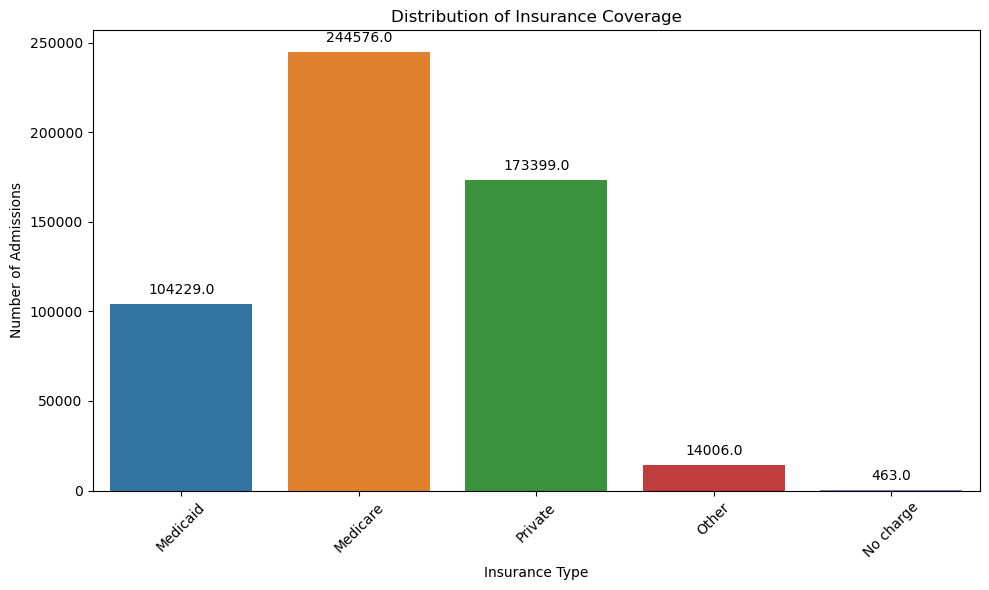

In [14]:
plt.figure(figsize=(10,6))
barplot = sns.countplot(data=admissions_df, x='insurance')
plt.title('Distribution of Insurance Coverage')
plt.xticks(rotation=45)
plt.xlabel('Insurance Type')
plt.ylabel('Number of Admissions')
for p in barplot.patches:
    barplot.annotate(f'{p.get_height()}', 
                      (p.get_x() + p.get_width() / 2, p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')
plt.tight_layout()
plt.show()

### Monthly Trends by Insurance Type

/Users/georgemathew/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/georgemathew/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/georgemathew/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/georgemathew/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When gr

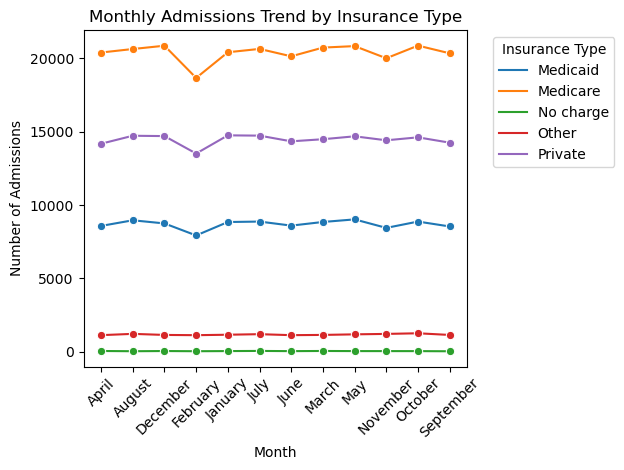

In [15]:
monthly_admissions = admissions_df.groupby(['admit_month', 'insurance']).size().reset_index(name='count')
lineplot = sns.lineplot(data=monthly_admissions, 
                        x='admit_month', 
                        y='count', 
                        hue='insurance',
                        marker='o')
plt.title('Monthly Admissions Trend by Insurance Type')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.legend(title='Insurance Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Language Distribution by Insurance Type

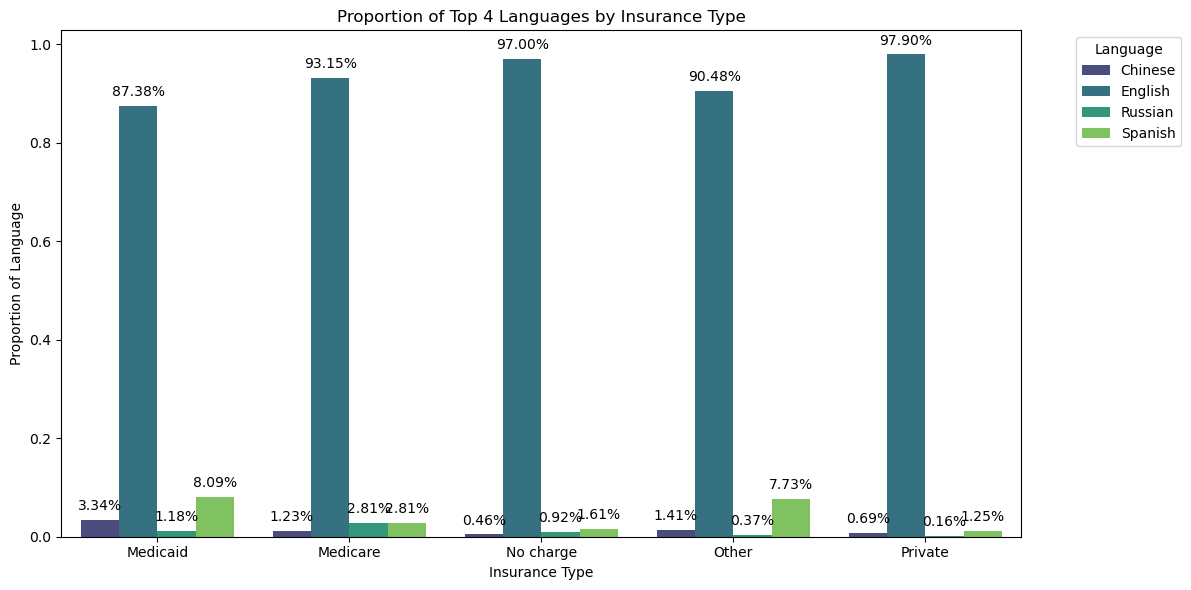

In [16]:
top_languages = admissions_df['language'].value_counts().nlargest(4).index
language_insurance_counts = admissions_df[admissions_df['language'].isin(top_languages)]
language_insurance_counts = language_insurance_counts.groupby(['insurance', 'language']).size().reset_index(name='count')
language_insurance_counts['count_total'] = language_insurance_counts.groupby('insurance')['count'].transform('sum')
language_insurance_counts['proportion'] = language_insurance_counts['count'] / language_insurance_counts['count_total']

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=language_insurance_counts, 
                       x='insurance', 
                       y='proportion', 
                       hue='language', 
                       palette='viridis')

for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2%}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.title('Proportion of Top 4 Languages by Insurance Type')
plt.xlabel('Insurance Type')
plt.ylabel('Proportion of Language')
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Medicare Visualizations

### Distribution of Admission Type for Medicare Admittances

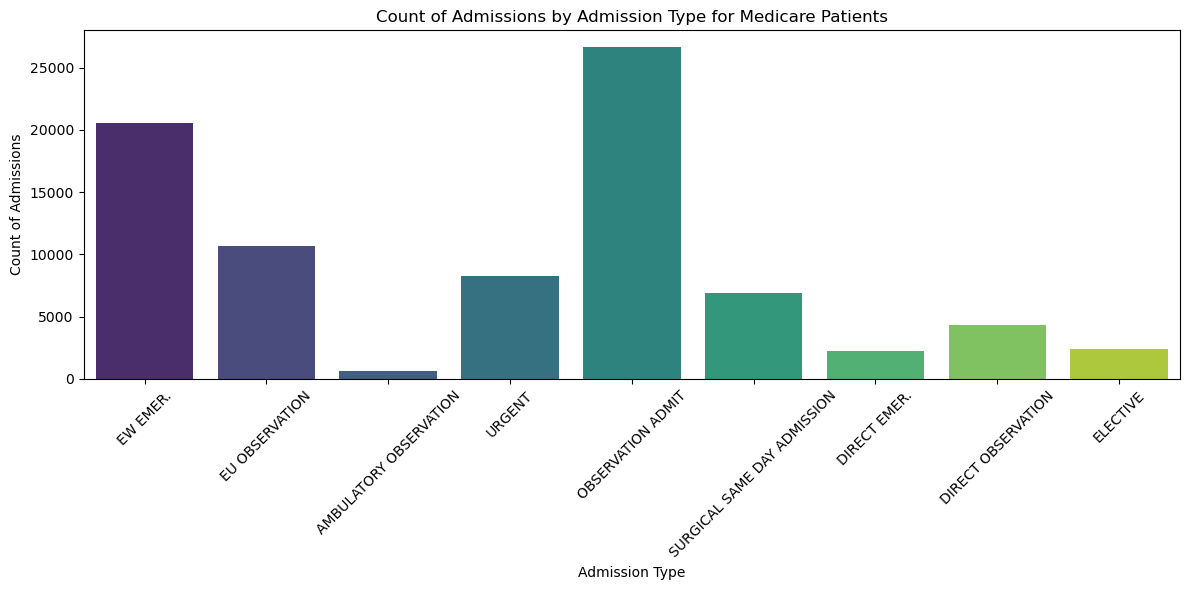

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='admission_type', palette='viridis')
plt.title('Count of Admissions by Admission Type for Medicare Patients')
plt.xlabel('Admission Type')
plt.ylabel('Count of Admissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Gender Distribution for Medicare Admittances

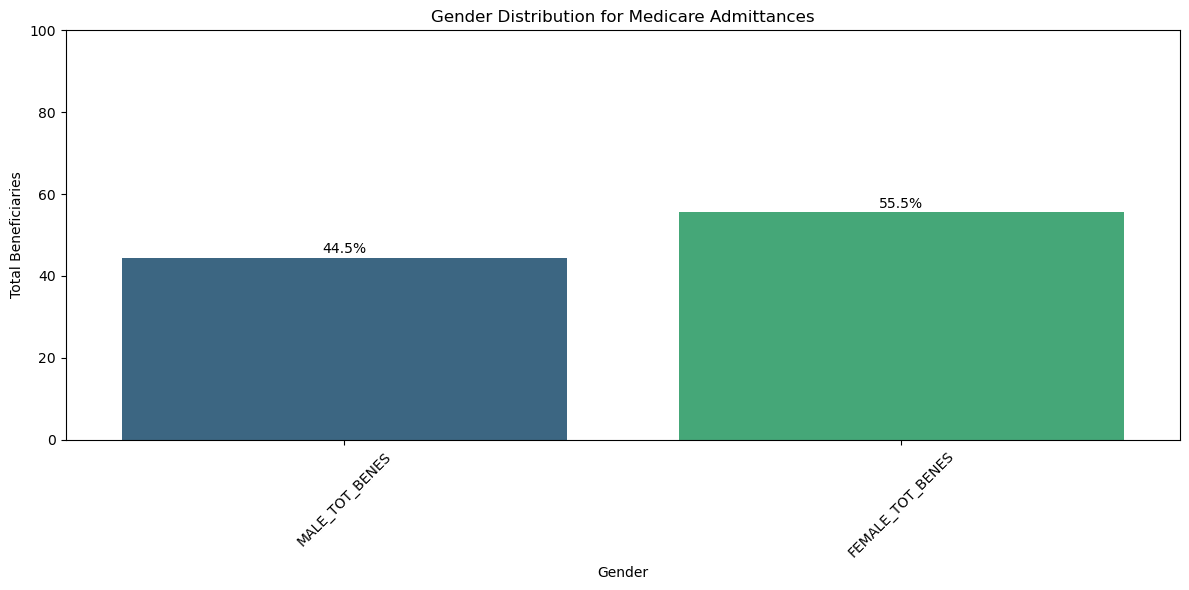

In [18]:
gender_columns = ['MALE_TOT_BENES', 'FEMALE_TOT_BENES']
gender_totals = merged_df[gender_columns].apply(pd.to_numeric, errors='coerce').sum()
gender_percentage_merged = gender_totals / gender_totals.sum() * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=gender_percentage_merged.index, y=gender_percentage_merged.values, palette='viridis')
plt.title('Gender Distribution for Medicare Admittances')
plt.xlabel('Gender')
plt.ylabel('Total Beneficiaries')
plt.ylim(0, 100)
plt.xticks(rotation=45)
for index, value in enumerate(gender_percentage_merged):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center')
plt.tight_layout()
plt.show()

### Age Distribution of Medicare Admittances

/Users/georgemathew/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


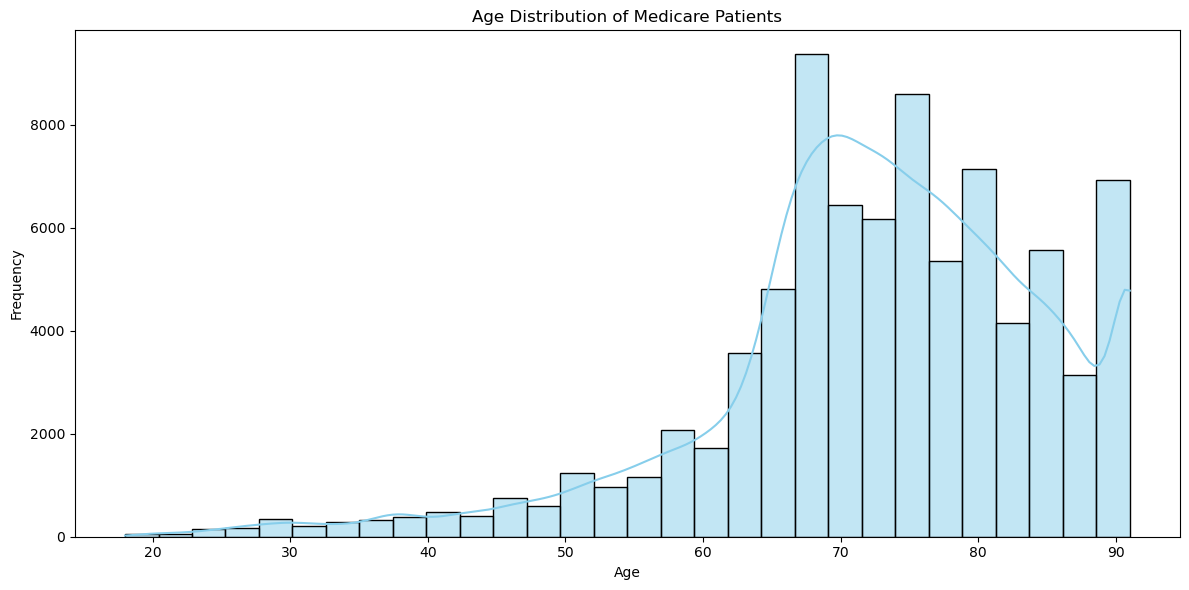

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['anchor_age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Medicare Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Race Distribution of Medicare Admittances

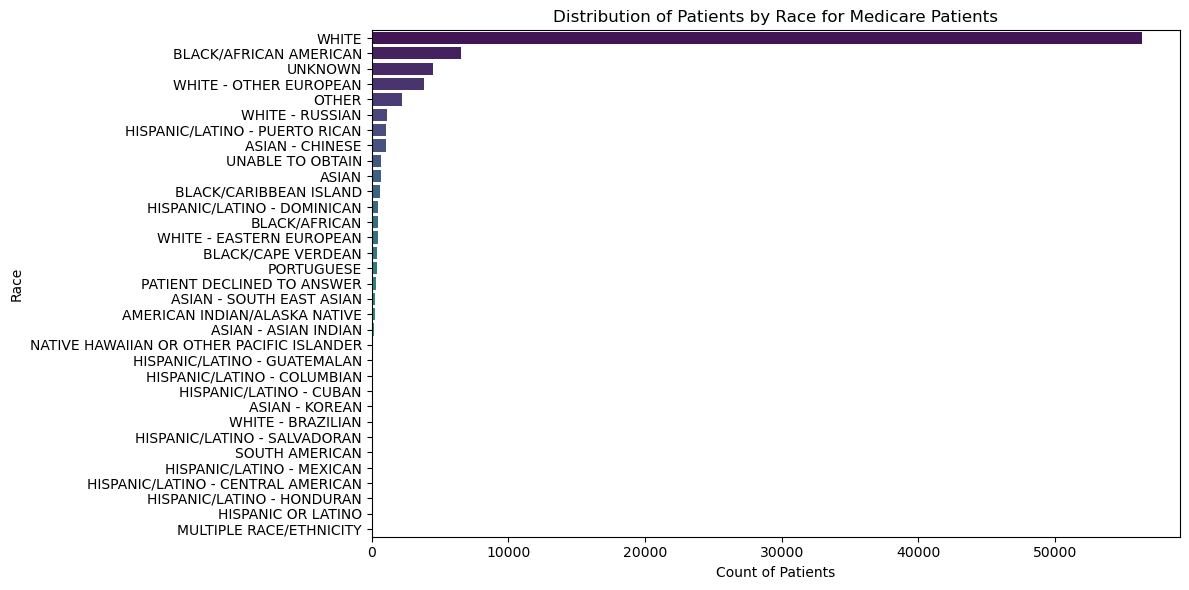

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, y='race', order=merged_df['race'].value_counts().index, palette='viridis')
plt.title('Distribution of Patients by Race for Medicare Patients')
plt.xlabel('Count of Patients')
plt.ylabel('Race')
plt.tight_layout()
plt.show()

### Gender Distribution of Medicare Beneficiaries in Suffolk County

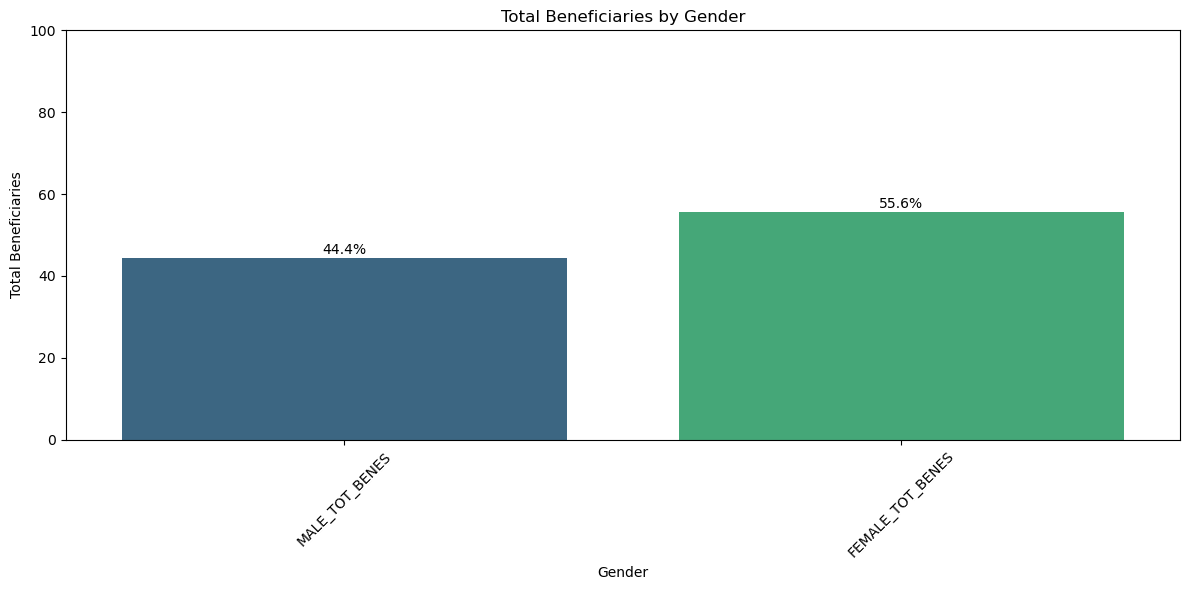

In [21]:
gender_columns = ['MALE_TOT_BENES', 'FEMALE_TOT_BENES']
gender_totals_cms = cms_suffolk_df[gender_columns].apply(pd.to_numeric, errors='coerce').sum()
gender_percentage_cms = gender_totals_cms / gender_totals_cms.sum() * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=gender_percentage_cms.index, y=gender_percentage_cms.values, palette='viridis')
plt.title('Total Beneficiaries by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Beneficiaries')
plt.ylim(0, 100)
plt.xticks(rotation=45)
for index, value in enumerate(gender_percentage_cms):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center')

plt.tight_layout()
plt.show()

### Age Distribution of Medicare Beneficiaries in Suffolk County

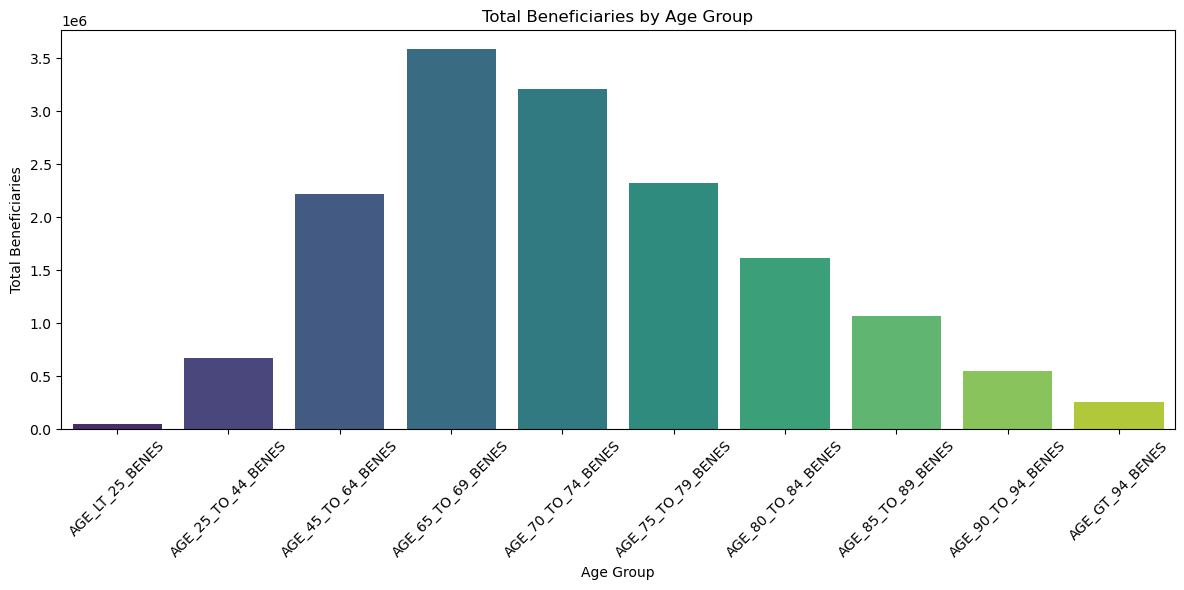

In [22]:
age_columns = [
    'AGE_LT_25_BENES', 'AGE_25_TO_44_BENES', 'AGE_45_TO_64_BENES',
    'AGE_65_TO_69_BENES', 'AGE_70_TO_74_BENES', 'AGE_75_TO_79_BENES',
    'AGE_80_TO_84_BENES', 'AGE_85_TO_89_BENES', 'AGE_90_TO_94_BENES',
    'AGE_GT_94_BENES'
]

age_totals = cms_suffolk_df[age_columns].apply(pd.to_numeric, errors='coerce').sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=age_totals.index, y=age_totals.values, palette='viridis')
plt.title('Total Beneficiaries by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Beneficiaries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()